In [2]:
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 39.3 MB/s eta 0:00:00


In [11]:
import pandas as pd
from Bio import SeqIO
import numpy as np # linear algebra
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
denv_dna = pd.read_table('/content/input_DENV.txt')
denv_dna.head()

,sequence,class
0,cgacagaaatccagacgtcaggaacgacaacaatcttcgcaggaca...,1
1,cgacagaaatccagacgtcaggaacgacaacaatcttcgcaggaca...,1
2,cgacagaaatccagacgtcaggaacgacaacaatcttcgcaggaca...,1
3,cgacagaaatccagacgtcaggaacgacaacaatcttcgcaggaca...,1
4,cgacagaaatccagacgtcaggaacgacaacaatcttcgcaggaca...,1


Text(0.5, 1.0, 'Class distribution of DENV DNA')

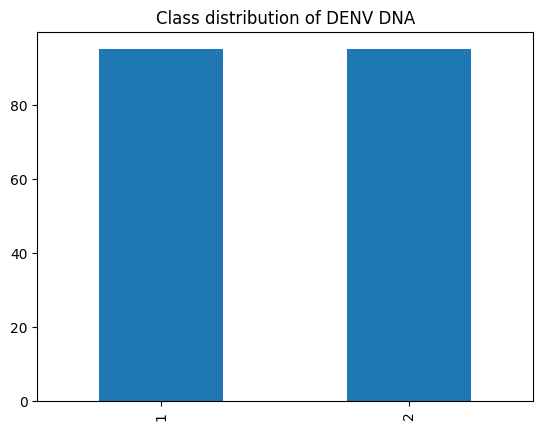

In [12]:
denv_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of DENV DNA")

In [13]:
def Kmers_funct(seq, size=6):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

#convert our training data sequences into short overlapping k-mers of length 6.
#Lets do that for each species of data we have using our Kmers_funct function.

denv_dna['words'] = denv_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
denv_dna = denv_dna.drop('sequence', axis=1)

In [14]:
denv_dna.head()

,class,words
0,1,"[cgacag, gacaga, acagaa, cagaaa, agaaat, gaaat..."
1,1,"[cgacag, gacaga, acagaa, cagaaa, agaaat, gaaat..."
2,1,"[cgacag, gacaga, acagaa, cagaaa, agaaat, gaaat..."
3,1,"[cgacag, gacaga, acagaa, cagaaa, agaaat, gaaat..."
4,1,"[cgacag, gacaga, acagaa, cagaaa, agaaat, gaaat..."


In [15]:
denv_texts = list(denv_dna['words'])
for item in range(len(denv_texts)):
    denv_texts[item] = ' '.join(denv_texts[item])
#separate labels
y_denv = denv_dna.iloc[:, 0].values

In [16]:
y_denv

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4)) #The n-gram size of 4 is previously determined by testing
X = cv.fit_transform(denv_texts)

In [18]:
print(X.shape)

(190, 537)


In [19]:
# Splitting the human dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y_denv,
                                                    test_size = 0.20,
                                                    random_state=42)

In [20]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix for predictions on human test DNA sequence\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on human test DNA sequence

Predicted   1   2
Actual           
1          18   0
2           1  19
accuracy = 0.974 
precision = 0.975 
recall = 0.974 
f1 = 0.974
